In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Исследование данных о продаже компьютерных игр

Целью данного исследования является выявление определяющих успешность компьютерной игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. 

В качестве объекта для исследований из открытых источников была взята выборка с историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Отлично. Есть вступление. Обозначена цель.


 </div>

### Откройте файл с данными и изучите общую информацию

In [3]:
data = pd.read_csv('/datasets/games.csv')

data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

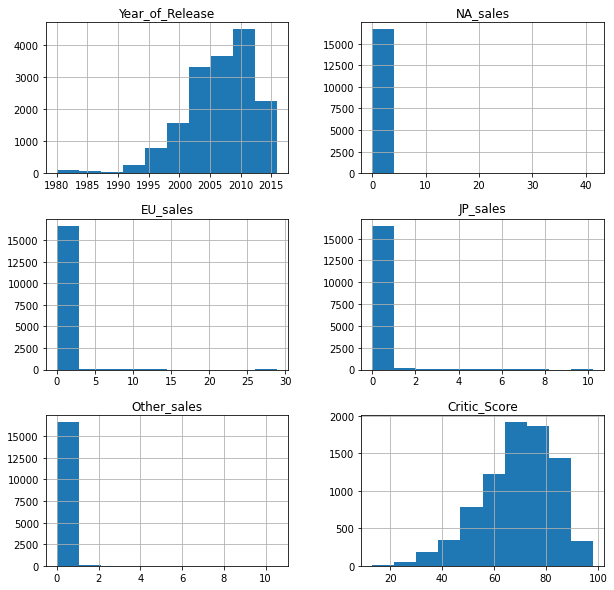

In [6]:
data.hist(figsize=(10, 10))

In [7]:
# топ-10 платформ по доле в выборке
data_platform = data.pivot_table(index='Platform', values='Name', aggfunc='count').sort_values(by='Name', ascending=False)
data_platform.rename(columns={'Name': 'count'}, inplace=True)
data_platform['percent'] = data_platform['count'] / data.shape[0] * 100
data_platform.head(10)

,count,percent
Platform,,
PS2,2161,12.928507
DS,2151,12.868681
PS3,1331,7.962908
Wii,1320,7.897098
X360,1262,7.550105
PSP,1209,7.233024
PS,1197,7.161232
PC,974,5.827101
XB,824,4.929704


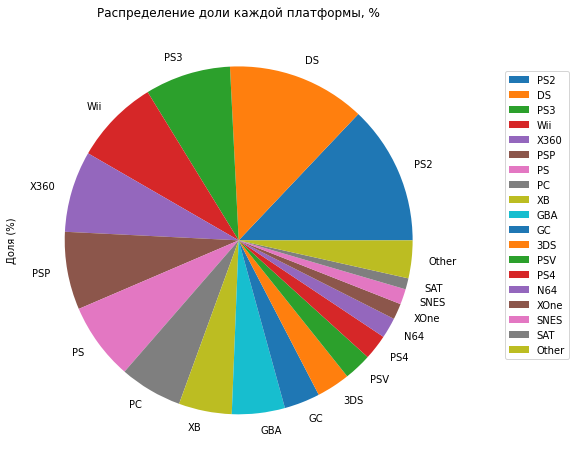

In [8]:
# выделим платформы с долей менее 1% в отдельный кусок "Other"
other_platforms = data_platform[data_platform['percent'] < 1].sum()
data_platform = data_platform[data_platform['percent'] >= 1]

other_platforms = pd.DataFrame({'count': [other_platforms['count']], 'percent': [other_platforms['percent']]}, index=['Other'])
data_platform = pd.concat([data_platform, other_platforms])

# построим круговую диаграмму
data_platform.plot(y='percent', kind='pie', figsize=(8, 8), legend=False)
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.9))
plt.title('Распределение доли каждой платформы, %')
plt.ylabel('Доля (%)')
plt.show()

При первом взгляде на данные в выборке можно сказать, что в нее включена информация о рейтинге и продажах компьютерных игр на различные игровые платформы с 1980 по 2016 год. 

Количество проданных копий хранится в столбцах **NA_sales, EU_sales, JP_sales и Other_sales** в миллионах, что не очень удобно, потому что например по межквартильному размаху, полученному через ***describe()*** видно что от 50 до 70% значений близки к нулю.

Можно заметить пропуски в столбцах **Year_of_Release, Critic_Score, User_Score и Rating**. Нам предстоит разобраться по какой причине это произошло и можно ли их заполнить на основании данных в самой выборке.

Следует привести к более подходящему типу данных значения в столбцах **Year_of_Release и User_Score**. Год будет удобнее анализировать, приведя к типу данных Date time, а пользовательский рейтинг - к числу с плавающей точкой вместо типа данных "объект".

Из круговой диаграммы видно, что около 50% всех платформ в выборке это устаревшие на 2016 год игровые приставки: Sony PS2, Nintendo DS, Sony PS3, Nintendo Wii и Xbox X360. Из этих данных пока рано делать какие-то выводы. Данные требуется сначала очистить, заполнить пропущенные значения по возможности и проанализировать взаимосвязи между столбцами.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Молодец! Хороший и внимательный взгляд на данные.</div>

### Предобработка данных

Исправим названия столбцов и приведем их к нижнему регистру для удобства.

In [9]:
data.columns = data.columns.str.lower()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Конечно, мы переименуем столбцы таким образом, но при работе с таблицами в pandas стоит избегать лишней обработки в циклах (хотя на таком количестве конечно это не критично). 
    
Можно использовать метод data.columns = data.columns.str.lower() 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Убрала цикл</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Хорошо</div>

Для нагладности, посмотрим на доли пропусков в столбцах в процентном соотношении.

In [10]:
missing_data = data.isnull().sum() / len(data) * 100
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False, inplace=True)
missing_data

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
dtype: float64

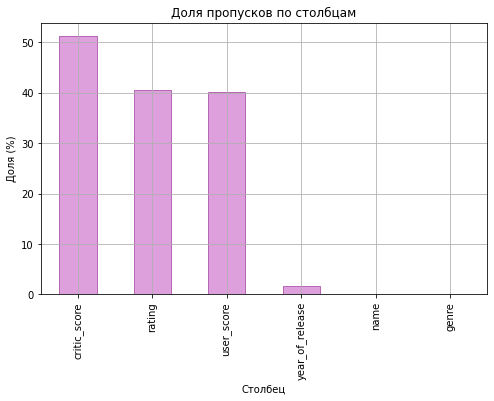

In [11]:
missing_data.plot(kind='bar', color='plum', grid=True, edgecolor='purple', linewidth=0.5, figsize=(8,5))
plt.title('Доля пропусков по столбцам')
plt.xlabel('Столбец')
plt.ylabel('Доля (%)')
plt.show()

Процент пропусков в столбце `'year_of_release` небольшой, но это очень важный параметр для дальнейшего исследования. Одни и те же игры выходили на разные платформы и можно это использовать для того, чтобы обогатить данные.

Обработаем пропуски в столбце 'year_of_release' на основании названия игры. 

In [12]:
# создадим словарь уникальных названий игр по году выпуска
game_to_year = dict(zip(data['name'].unique(), data.groupby('name')['year_of_release'].first()))

# используем метод map для заполнения пропущенных значений в 'year_of_release'
data['year_of_release'].fillna(data['name'].map(game_to_year), inplace=True)

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release       6
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Столбцы 'name', 'year_of_release', 'genre' содержат небольшое количество значений NaN, от которых лучше очистить датасет, потому что значения в этих столбцах важны для дальнейшего анализа данных.

In [14]:
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ А можно просто оценить долю пропусков в этом параметре (как и во всех остальных) чтобы принять решение по заполнению/удалению/невозможности уадления-заполнения. Как раз с годом выпуска это может избавить от лишних замен.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлены доли пропусков в процентах и в виде графика. Не согласна с тем, что заполнение пропущенных годов - лишнее. Это основной параметр для дальнейшего анализа. И если его можно заполнить на основании текущих данных, то я думаю, что это целесообразно.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера 2:</b>⚠️ 
    
По самому подходу заполнения основываясь на выход игры на других платформах, то здесь масса различных ситуаций. 
Игра выходит на одной платформе и только через пару лет дорабатывается для других платформ. Или выпускается игра и через 10 лет ее продаж выпускается под тем же названием как юбилейный выпуск. 
    
При доле 1,6% данных, которые мы заполним,  это не внесет особого влияния на наше исследование, но мы и не испортим ничего в анализе))     
</div>

In [15]:
# проверка на дубликаты
print("Дубликатов:", data.duplicated().sum())

Дубликатов: 0


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Можно сразу использовать duplicated().sum() непосредственно к датафрейму не создавая series 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Код переписан без создания переменной.</div>

Приведем 'year_of_release' к типу данных int, потому что при приведении столбца к типу Date time, и извлечении из полученных значений года, получится то же целочисленное значение.

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Согласна </div>

Переведем количество проданных копий в 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' в тысячи.

In [17]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mul(1000)

In [18]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16707 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16707 non-null  object 
 1   platform         16707 non-null  object 
 2   year_of_release  16707 non-null  int64  
 3   genre            16707 non-null  object 
 4   na_sales         16707 non-null  float64
 5   eu_sales         16707 non-null  float64
 6   jp_sales         16707 non-null  float64
 7   other_sales      16707 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       10011 non-null  object 
 10  rating           9946 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360.0,28960.0,3770.0,8450.0,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680.0,12760.0,3790.0,3290.0,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610.0,10930.0,3280.0,2950.0,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,NaN


Столбец 'user_score' кроме числовых, содержит значение 'tbd', что означает 'to be determined' (подлежит определению). Чтобы перевести значения к типу данных float, заменим их на NaN.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Да, мы тем самым сохраним однородность данных </div>

Коэффициент корреляции между "critic_score" и "user_score" составляет 0.58


<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

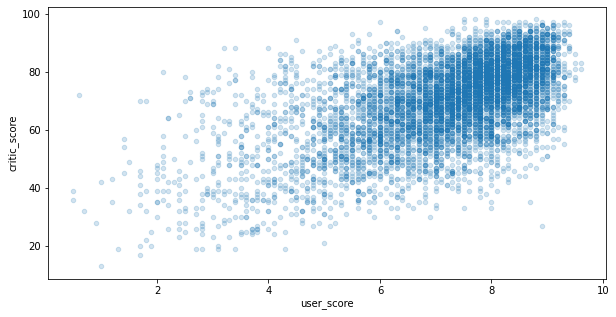

In [19]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)

# проверим корреляцию между 'critic_score' и 'user_score'
corr = data['critic_score'].corr(data['user_score'])
print(f'Коэффициент корреляции между "critic_score" и "user_score" составляет {corr:.2f}')

data.plot(x='user_score', y='critic_score',  kind='scatter', alpha=0.2, figsize=(10, 5))

Значение 0,58 — умеренная положительная корреляция. Это не очень сильная положительная корреляция, и на графике видно, что оценки критиков и пользователей сходятся только когда рейтинг игр высокий. БОльшая часть игр получила оченки и пользователей и критиков выше 5/50 баллов.

Можно проверить, какой процент строк содержит пропуски в одних и тех же ячейках со столбцами 'critic_score' и 'user_score'.

In [20]:
result = (data['critic_score'].isnull() & 
          data['user_score'].isnull())

percentage = 100 * result.mean()

print(f'{percentage:.2f}% строк содержит пропуски в столбцах "critic_score" и "user_score".')

47.88% строк содержит пропуски в столбцах "critic_score" и "user_score".


Практически у половины строк отсутствуют данные и об оценке критиков и об оценке пользователей. Процент совпадения большой, что мешает заполнить столбцы медианными значениями друг друга, что было бы некорректно в данном случае. И так как заполнить ячейки достоверными данными мы не можем, то Оставим значения NaN в этих строках, чтобы не искажать данные.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Соглашусь с тобой.  </div>

In [21]:
# уникальные значения в 'rating'
data['rating'].value_counts()

E       3989
T       2961
M       1562
E10+    1419
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

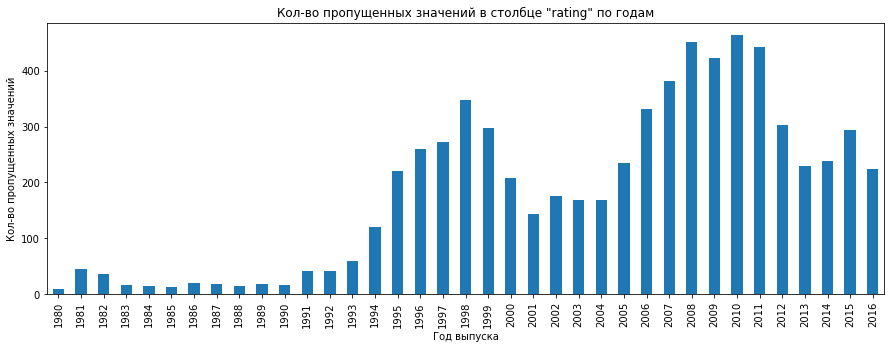

In [22]:
# построим диаграмму пропущенных значений по годам
missing_rating_by_year = data.groupby('year_of_release')['rating'].apply(lambda x: x.isnull().sum())

missing_rating_by_year.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во пропущенных значений')
plt.title('Кол-во пропущенных значений в столбце "rating" по годам')
plt.show()

Из графика видно, что пропущенные значения нельзя объяснить тем, что игры были выпущены до года основания ESRB в 1994 году. Так как у нас в датасете есть данные о продажах по всему миру, а ESRB занимается определением рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде, это может объяснить большое кол-во пропусков. Оставляем пропущенные значения, чтобы проанализировать причину их появления в дальнейшем исследовании. 

В столбце `'rating'` используется сокращенное название рейтинга. Чтобы работать с данными было удобнее, добавим столбец с расшифрованными значениями и присвоим всем пропущенным особое наименование 'Not rated'.

In [23]:
def decode_esrb(rating):
    esrb_dict = {
        'E': 'Everyone',
        'T': 'Teen',
        'M': 'Mature',
        'AO': 'Adults Only',
        'E10+': 'Everyone 10+',
        'EC': 'Early Childhood',
        'K-A': 'Kids to Adults',
        'RP': 'Rating Pending'
    }
    return esrb_dict.get(rating, 'Not rated')

data['esrb_decoded'] = data['rating'].apply(decode_esrb)
data['esrb_decoded'].value_counts()


Not rated          6761
Everyone           3989
Teen               2961
Mature             1562
Everyone 10+       1419
Early Childhood       8
Kids to Adults        3
Rating Pending        3
Adults Only           1
Name: esrb_decoded, dtype: int64

Новое значение появилось и заняло первую строку по кол-вам значений.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Инструментами ты прекрасно владеешь молодец. 
    
Твоя идея волне имеет право на жизнь поскольку логично, что игра на разных платформах имеет одинаковый рейтинг. Но  давай подумаем о самой сути пропуска. Иногда пропуск сам по себе является ценной информацией. Для каких стран создавалась система ESRB? Будут ли стараться авторы игр для локального рынка других стран получить рейтинг ESRB? И будет ли использоваться рейтинг например для игр выпущенных на платформах стран, которые рейтинг не используют? 
    
Давай посмотрим на масштаб. 
В данных с более 40% пропусков мы вносим изменения, предположив что пропуски случайны. Заменяем почти 20% данных, тем самым явно можем повлиять на ход исследования, если твое предположение не всегда верно....
    
В анализе заполнение пропусков как раз не самоцель. Важнее понять что за этим стоит. 
    
    
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна с замечанием, пропуски не случайны. Замена пропусков на основании наименования убрана.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Хорошо. Верно объясняешь возможную причину возникновения пропуска в рейтингах.  Сможем в шаге влияния рейтинга на продажи в регионах учесть это и проверить.</div>

Добавим в таблицу новый столбец 'total_sales' с информацией об общих продажах.

In [24]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_decoded,total_sales
0,Wii Sports,Wii,2006,Sports,41360.0,28960.0,3770.0,8450.0,76.0,8.0,E,Everyone,82540.0
1,Super Mario Bros.,NES,1985,Platform,29080.0,3580.0,6810.0,770.0,NaN,NaN,NaN,Not rated,40240.0
2,Mario Kart Wii,Wii,2008,Racing,15680.0,12760.0,3790.0,3290.0,82.0,8.3,E,Everyone,35520.0
3,Wii Sports Resort,Wii,2009,Sports,15610.0,10930.0,3280.0,2950.0,80.0,8.0,E,Everyone,32770.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270.0,8890.0,10220.0,1000.0,NaN,NaN,NaN,Not rated,31380.0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Молодец. Все части рынка охвачены, метод применен оптимальный</div>

### Исследовательский анализ данных

#### Определение актуального периода и платформ для исследования

Посмотрим, сколько игр выпускалось в разные годы.

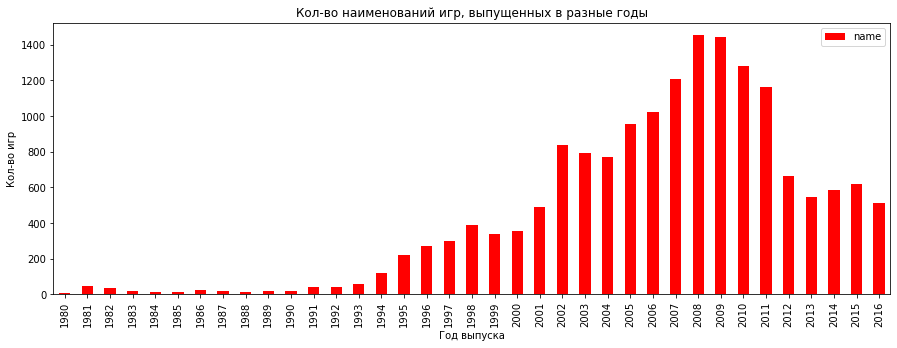

In [25]:
pivot_year = data.pivot_table(index="year_of_release", values="name", aggfunc="count")

pivot_year.plot(kind="bar", color="red", figsize=(15, 5))
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во игр")
plt.title("Кол-во наименований игр, выпущенных в разные годы")

plt.show()

Можно заметить пик в кол-ве выпущенных игр с 2005 по 2012 года. Время большой популярности игровых приставок. Однако, это не говорит о том, что эти игры были высоко оценены и хорошо продаваемы. С 1980 и по 2000 год рынок игр был другой, многие платформы с того времени устарели. Не будем их учитывать в дальнейшем анализе и посмотрим на то, как менялись продажи по платформам с 2000 года.

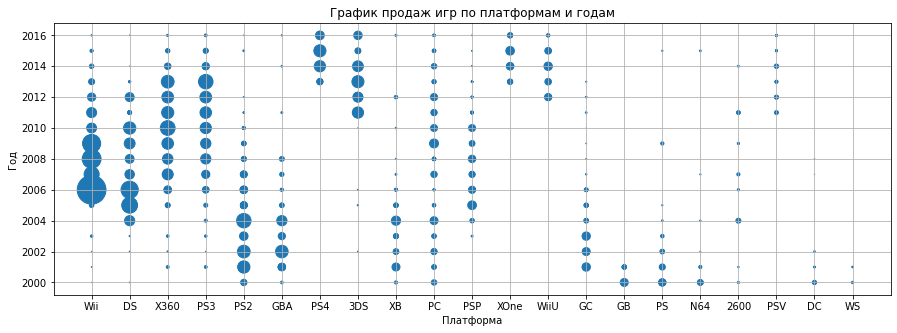

In [26]:
# сохраним копию первоначального датафрейма
data_copy = data.copy()

# отфильтруем данные с 2000 года и позднее, чтобы в них не попадали устаревшие платформы
data_copy = data_copy[data_copy["year_of_release"] >= 2000]

# строим графики по каждой платформе
data_copy.plot.scatter(x="platform", y="year_of_release", s=data_copy["total_sales"]/100,
                        grid=True, figsize=(15, 5))


plt.xlabel("Платформа")
plt.ylabel("Год")
plt.title("График продаж игр по платформам и годам")

plt.show()

Из визуализации можно сделать вывод, что жизненный цикл самых популярных платформ - около 8 лет. В целом можно заметить, что с 2004 по 2012 года платформы стартовали на более высоком уровне продаж и дольше держались в топе. Самой успешной платформой по продаже игр в один год за это время можно назвать Wii, ни у одной другой платформы не было такого объема продаж в течение года. Продажи игр на ПК держатся на стабильном среднем уровне. Для того, чтобы определиться с потенциально самыми прибыльными платформами на 2017 год, построим график, исключив данные до 2013 года.Это оптимальным решение, чтобы оценить тенденции, идущие на спад, популярные жанры и общую статистику.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Хороший график с заголовками, замечательный вывод. 
    
Здесь, вопросы к самому графику 
    
Как отличить PS3 от 3DS, DS от PSP, 2600 и PS2 и XOne ?  Как ты делала по нему вывод?
    
по визуализации еще предстоят занятия и ты сможешь разобраться с этим подробнее, но тогда возможно стоит сейчас использовать инструмент, который бы однозначно подтверждал твои выводы.  

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> График исправила, долго думала, как это сделать, но в итоге получилось. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Интересный выход и получилось очень показательно! Молодец!</div>

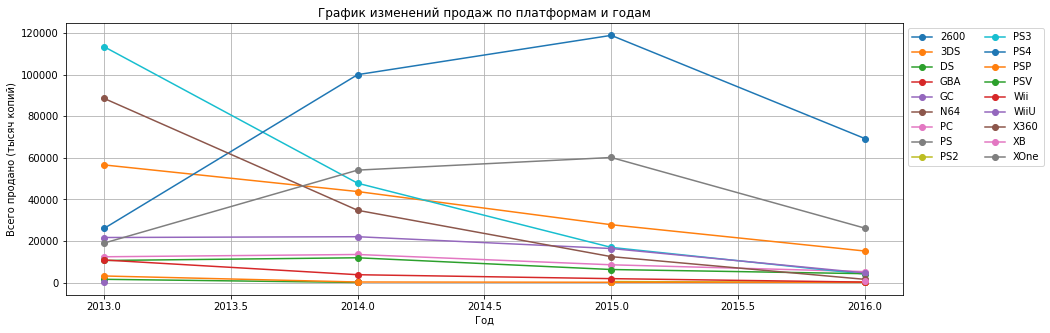

In [27]:
# сохраним в data актуальный период для исследований
data_copy = data_copy[data_copy["year_of_release"] >= 2013]

pivot_platform = data_copy.pivot_table(index="year_of_release", values="total_sales", columns="platform", aggfunc=sum)

for platform in pivot_platform.columns:
    pivot_platform[platform].plot(style='o-', label=platform, grid=True, figsize=(15, 5))
    
plt.xlabel("Год")
plt.ylabel("Всего продано (тысяч копий)")
plt.title("График изменений продаж по платформам и годам")

plt.legend(bbox_to_anchor=(1, 1), ncol=2)

plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.
    
    
Пожалуйста, рассмотри еще раз вопрос выбора акутального периода. 
    
    
- Обрати внимание, что при создании копии датафрейма, стоит использовать инструмент .copy(), чтобы любые изменения, которые ты вносишь в подмножество, не применялись к исходному DataFrame(). Это может сыграть злую шутку.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Вместо использования исходного датафрейма, создала копию. Взяла для исследования данные с 2013 года включительно. Никто не может мне помочь, как убрать лишние платформы из легенды, мне видно какие где, ничего с этим поделать не могу. На фоне переделки прктически всей работы с почти 20-тью замечаниями и общем времени работы над проектом больше 50 часов, вместо заявленных 16, я надеюсь на понимание.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Хорошо. С визуализацией еще предстоят отдельные темы. Здесь можно дополнительно ограничить явно неакутальные платформы по объему продаж, задав порог, который на графике то и не заметен, но избавит от лишнего груза.

Стоит посмотреть на срез. почему они вообще попадают в актуальный период и отсечь их еще там вместе с ограничением по году. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера 3:</b>✔️ Посмотрела еще раз на получившиеся графики - здесь и далее на боксплоты. Скорее всего отжившие платформы попадают в выборку акутального периода после заполнения пропусков в годах выпуска игры.  </div>

Анализ данных проводится в декабре 2016 года и данные за текущий год могут быть неполными, но скорее всего можно сказать о некотором спаде в продажах на все виды игровых платформ. Что можно было заметить и на общем графике с 2014 года.

На дату проведения анализа самыми популярными и потенциально прибыльными платформами на 2017 год можно назвать Sony PS4, Xbox One и Nintendo 3DS. Также в этот список можно включить показывающий стабильные результаты из года в год ПК (PC) и немного сдающий позиции WiiU.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌

Пожалуйста, обрати внимание, что для дальнейшего анализа берем данные актуального периода, все верно. Но мы не ограничиваемся рассмотрением только топовых платформ. 
    
Шаг в котором требуется обозначить несколько потенциально прибыльных платформ предусматривает, что на данных актуального периода, мы определяем их на основании показателей по продажам.
    
Но для построения бокс-плота мы берем все платформы . Пожалуйста, скорректируй.    
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено. Боксплот построен по всем платформам. В задании указано "Выберите несколько потенциально прибыльных платформ" перед пунктом про боксплоты, следовало бы исправить ТЗ, чтобы было понятнее.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Согласна. в брифе проекта стоит конкретизировать этот момент. </div>

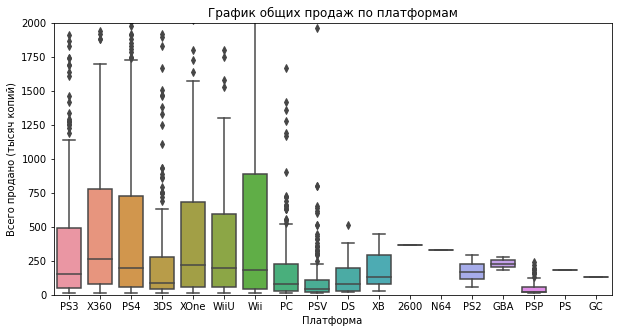

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="platform", y="total_sales", data=data_copy, ax=ax)

plt.ylim(0, 2000)
plt.xlabel("Платформа")
plt.ylabel("Всего продано (тысяч копий)")
plt.title("График общих продаж по платформам")

plt.show()

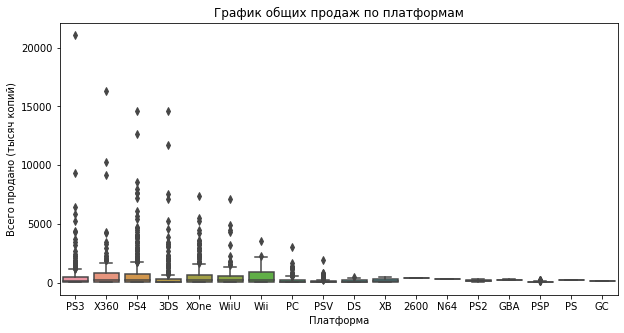

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="platform", y="total_sales", data=data_copy, ax=ax)

plt.xlabel("Платформа")
plt.ylabel("Всего продано (тысяч копий)")
plt.title("График общих продаж по платформам")

plt.show()

In [30]:
grouped_data = data_copy.groupby("platform")
for platform, group in grouped_data:
    print("Platform:", platform)
    print(group["total_sales"].describe())

Platform: 2600
count      1.0
mean     370.0
std        NaN
min      370.0
25%      370.0
50%      370.0
75%      370.0
max      370.0
Name: total_sales, dtype: float64
Platform: 3DS
count      304.000000
mean       471.282895
std       1379.309867
min         10.000000
25%         40.000000
50%         90.000000
75%        280.000000
max      14600.000000
Name: total_sales, dtype: float64
Platform: DS
count     11.000000
mean     146.363636
std      164.211615
min       20.000000
25%       30.000000
50%       80.000000
75%      195.000000
max      510.000000
Name: total_sales, dtype: float64
Platform: GBA
count      2.000000
mean     230.000000
std       70.710678
min      180.000000
25%      205.000000
50%      230.000000
75%      255.000000
max      280.000000
Name: total_sales, dtype: float64
Platform: GC
count      1.0
mean     130.0
std        NaN
min      130.0
25%      130.0
50%      130.0
75%      130.0
max      130.0
Name: total_sales, dtype: float64
Platform: N64
count      

Наличие сильных выбросов, как в большую, так и в меньшую сторону, может привести к смещению медианы. Если в данных присутствует много высоких значений, то медиана будет смещена в сторону нижнего квартиля, а если в данных присутствует много низких значений, то медиана будет смещена в сторону верхнего квартиля.

Мы видим, что практически у всех платформ медиана смещена к нижнему квартилю, что произошло из-за наличия выбросов по продажам хитовых игр на платформах. Больше всего топовых по продажам игр выходило у PS3, X360, PS4 и 3DS. Также хорошие показатели у XOne и WiiU.

PS3, X360 и Wii, несмотря на хорошие средние значения продаж, уже устарели и в последний год показывают снижение.

Несмотря на большое кол-во хитов, 50% проданных игр у многих платформ находится почти на одном невысоком уровне - 150-200 тысяч копий. 50% игр на ПК продались в 80 тыс.копий.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Здесь в дополнение исправлений по вхождению всех платформ, стоит добавить и график с общей картиной. По нему ты сможешь сделать выводы по выбросам. У каких платформ те самые хиты продаж. 
    
    
Как ты понимаешь смещение медианы к нижнему квартилю практически у всех платформ?    
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> График с общей картиной построен, про смещение пояснила.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️ Отличное описание с пониманием в контексте нашего проекта. Молодец</div>

#### Влияние отзывов пользователей и критиков на продажи

Посмотрим, как влияют на продажи внутри самой популярной на 2016 год платформы, отзывы пользователей и критиков. Для этого построим диаграмму рассеяния по платформе **Sony PS4**.

Корреляция между оценкой критиков и кол-вом проданных копий для PS4 составила 0.41
Корреляция между оценкой пользователей и кол-вом проданных копий для PS4 составила -0.03


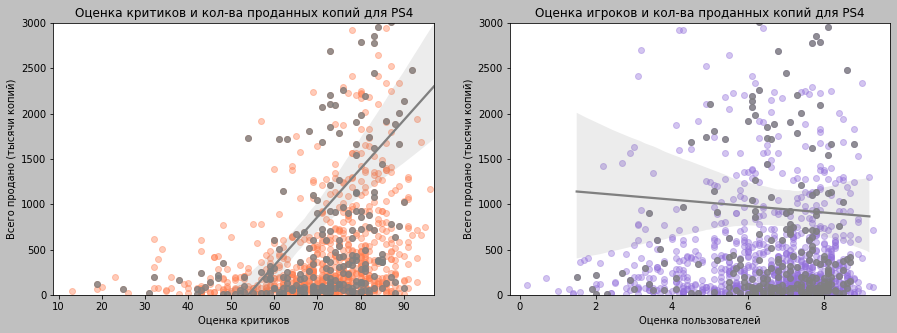

In [31]:
# функция принимает аргументы - датасет и нужную платформу и строит 2 графика рядом: по оценкам критиков и польз-лей
def plot_sales_by_platform(data, platform):
    data_platform = data[data["platform"] == platform]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), facecolor='silver')
    ax1.scatter(data["critic_score"], data["total_sales"], color='coral', alpha=0.4)
    sns.regplot(x="critic_score", y="total_sales", data=data_platform, color='gray', ax=ax1) # строим линию регрессии между данными
    ax1.set_ylim(0, 3000)
    ax1.set_title(f"Оценка критиков и кол-ва проданных копий для {platform}")
    ax1.set_xlabel("Оценка критиков")
    ax1.set_ylabel("Всего продано (тысячи копий)")
    
    ax2.scatter(data["user_score"], data["total_sales"], color='mediumpurple', alpha=0.4)
    sns.regplot(x="user_score", y="total_sales", data=data_platform, color='gray', ax=ax2)
    ax2.set_ylim(0, 3000)
    ax2.set_title(f"Оценка игроков и кол-ва проданных копий для {platform}")
    ax2.set_xlabel("Оценка пользователей")
    ax2.set_ylabel("Всего продано (тысячи копий)")
    
    critic_correlation = data_platform["critic_score"].corr(data["total_sales"])
    user_correlation = data_platform["user_score"].corr(data["total_sales"])
    print(f"Корреляция между оценкой критиков и кол-вом проданных копий для {platform} составила {critic_correlation:.2f}")
    print(f"Корреляция между оценкой пользователей и кол-вом проданных копий для {platform} составила {user_correlation:.2f}")
    
    plt.show()


plot_sales_by_platform(data_copy, "PS4")

Положительная оценка критиков слабо влияет на кол-во проданных копий. Уровень продаж у игр, получивших достаточно высокую оценку, выше 70 из 100, в среднем растет, но многие так и не смогли преодолеть низкий уровень продаж (около 150 тысяч копий). В тоже время есть и игры, которые продавались в большем кол-ве, несмотря на низкий рейтинг критиков.
Корреляции между оценкой пользователей и кол-вом проданных копий практически нет. Можно заметить, что при более высокой оценке, только увеличивается кол-во игр, проданных в меньшем кол-ве экземпляров. Возможно игроки высоко оценивают инди-игры, которые могут быть не так популярны, как бестселлеры, но тоже имеют свою аудиторию.

Линия регрессии на графике с оценками пользователей практически прямая, немного наклонена вниз, что подтверждает гипотезу о незначительной связи оценок пользователей и кол-вом проданных копий игр. 

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ 
    
- необходимо будет проверить результаты на акутальном периоде. 
- верно трактуешь коэффициент корреляции и делаешь хорошее предположение по объяснению полученного результата.
- в выводе пишешь о подтверждении гипотезы - объясни пожалуйста. возможно, я упустила твою формулировку гипотезы.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлен период. Корреляция и выводы не изменились. Гипотезой я назвала предположение о том, что "корреляции между оценкой пользователей и кол-вом проданных копий практически нет" до того, как я описываю саму линию регрессии. При рассмотрении линии регрессии мне кажется это более очевидным. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️ Хорошо. Действительно для акутального периода картина не изменилась. 
Спасибо, по гипотезе поняла. </div>

Посмотрим остальные платформы.

Корреляция между оценкой критиков и кол-вом проданных копий для PS3 составила 0.33
Корреляция между оценкой пользователей и кол-вом проданных копий для PS3 составила 0.00


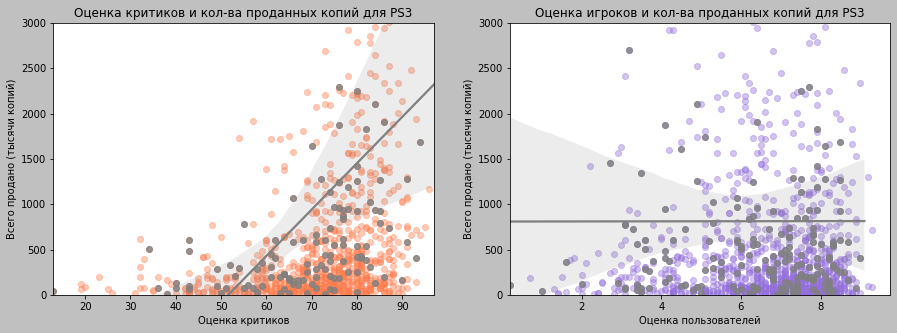

Корреляция между оценкой критиков и кол-вом проданных копий для X360 составила 0.35
Корреляция между оценкой пользователей и кол-вом проданных копий для X360 составила -0.01


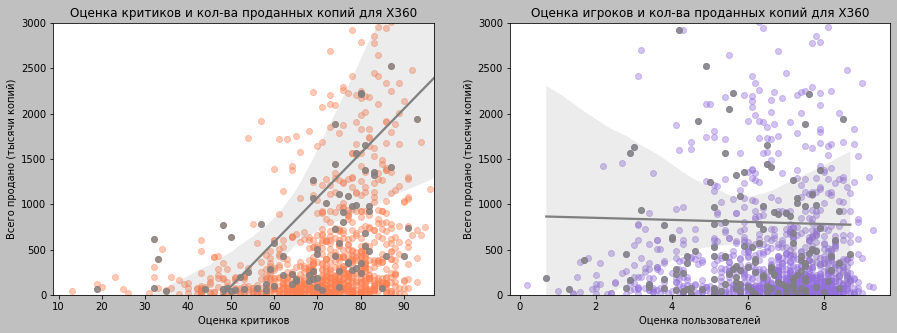

Корреляция между оценкой критиков и кол-вом проданных копий для PS4 составила 0.41
Корреляция между оценкой пользователей и кол-вом проданных копий для PS4 составила -0.03


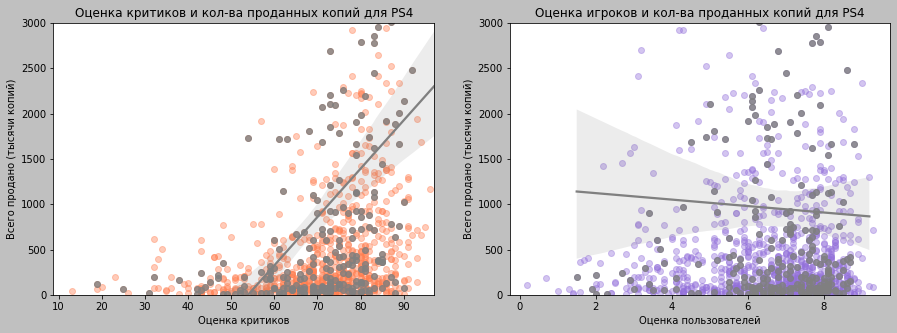

Корреляция между оценкой критиков и кол-вом проданных копий для 3DS составила 0.36
Корреляция между оценкой пользователей и кол-вом проданных копий для 3DS составила 0.24


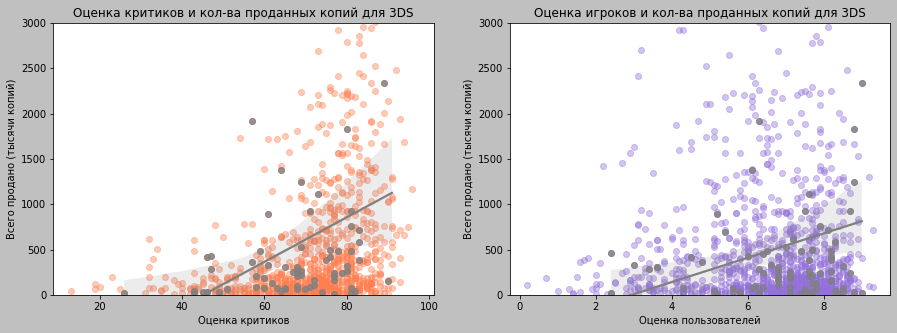

Корреляция между оценкой критиков и кол-вом проданных копий для XOne составила 0.42
Корреляция между оценкой пользователей и кол-вом проданных копий для XOne составила -0.07


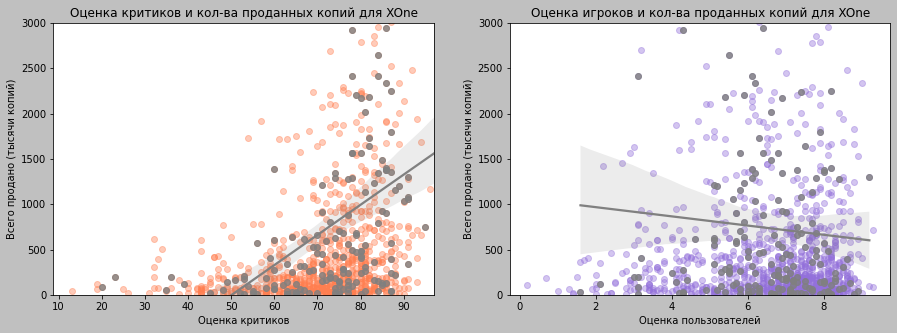

Корреляция между оценкой критиков и кол-вом проданных копий для WiiU составила 0.38
Корреляция между оценкой пользователей и кол-вом проданных копий для WiiU составила 0.42


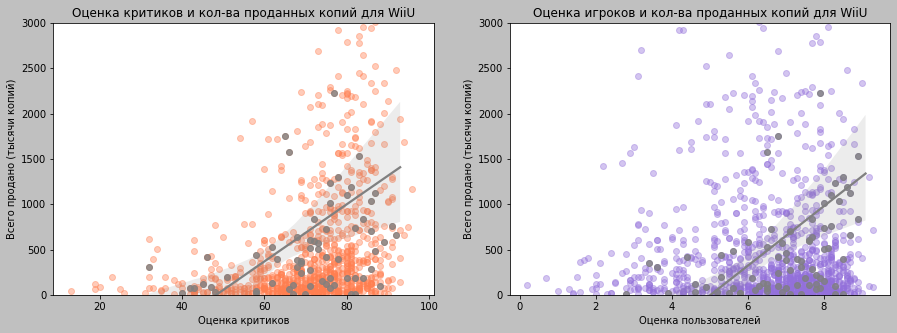

Корреляция между оценкой критиков и кол-вом проданных копий для Wii составила -1.00
Корреляция между оценкой пользователей и кол-вом проданных копий для Wii составила 0.68


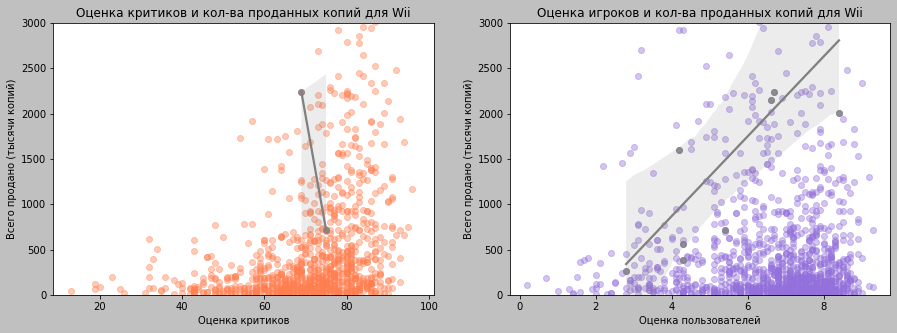

Корреляция между оценкой критиков и кол-вом проданных копий для PC составила 0.20
Корреляция между оценкой пользователей и кол-вом проданных копий для PC составила -0.09


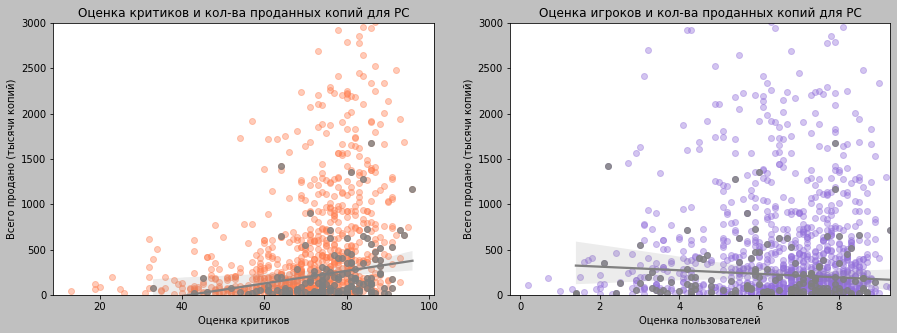

Корреляция между оценкой критиков и кол-вом проданных копий для PSV составила 0.25
Корреляция между оценкой пользователей и кол-вом проданных копий для PSV составила 0.00


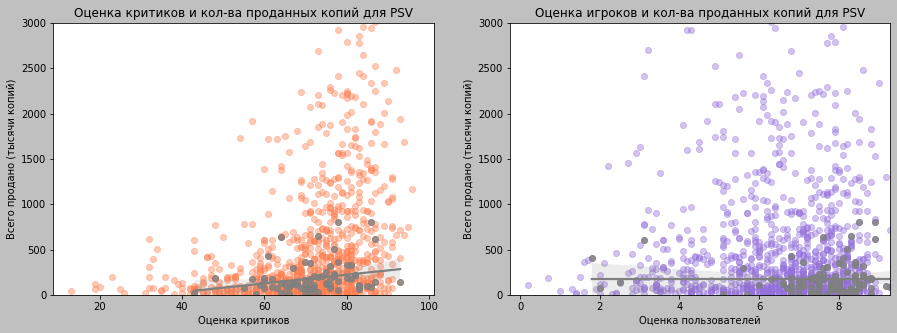

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между оценкой критиков и кол-вом проданных копий для DS составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для DS составила nan


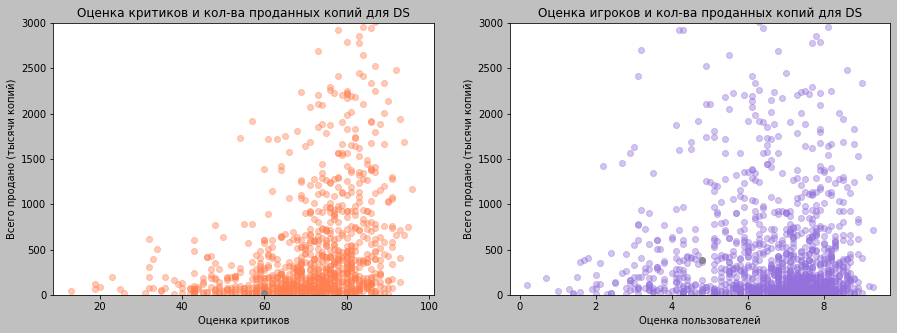

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между оценкой критиков и кол-вом проданных копий для XB составила 0.91
Корреляция между оценкой пользователей и кол-вом проданных копий для XB составила nan


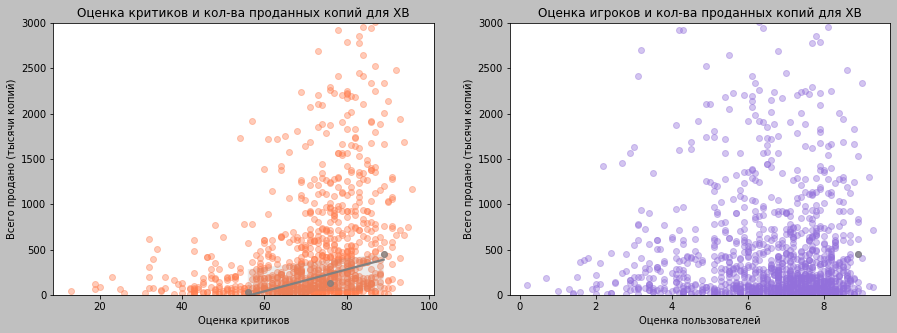

Корреляция между оценкой критиков и кол-вом проданных копий для 2600 составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для 2600 составила nan


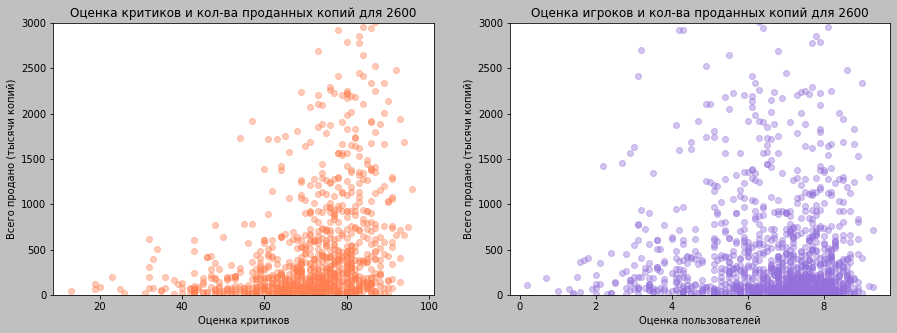

Корреляция между оценкой критиков и кол-вом проданных копий для N64 составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для N64 составила nan


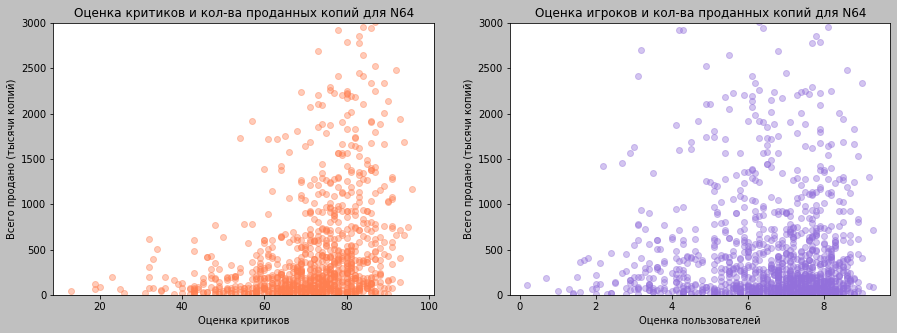

Корреляция между оценкой критиков и кол-вом проданных копий для PS2 составила 0.71
Корреляция между оценкой пользователей и кол-вом проданных копий для PS2 составила 1.00


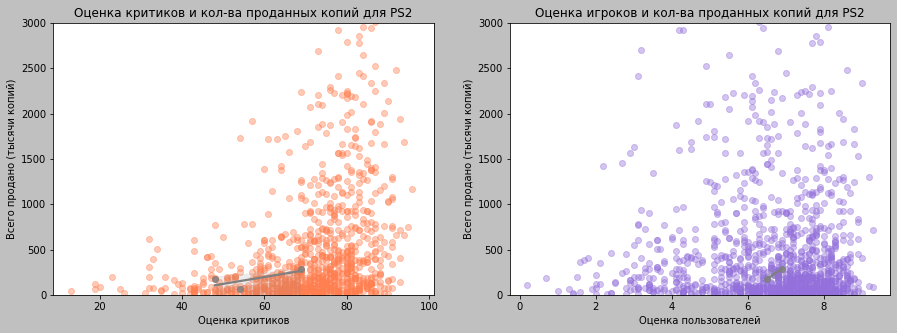

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между оценкой критиков и кол-вом проданных копий для GBA составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для GBA составила nan


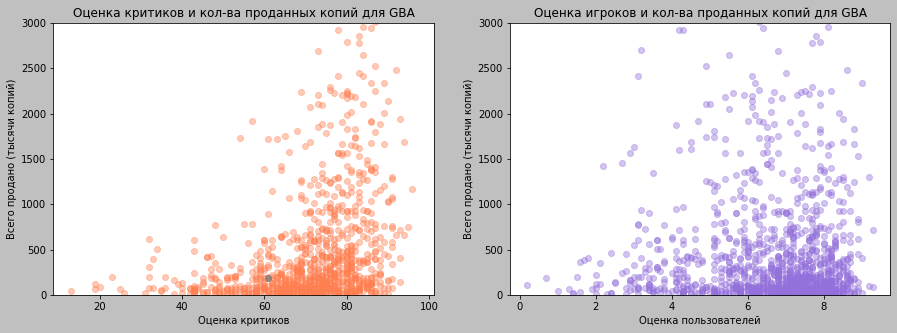

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Корреляция между оценкой критиков и кол-вом проданных копий для PSP составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для PSP составила -1.00


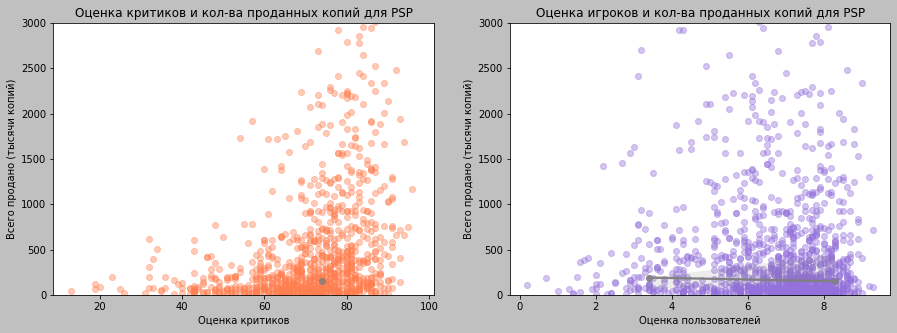

Корреляция между оценкой критиков и кол-вом проданных копий для PS составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для PS составила nan


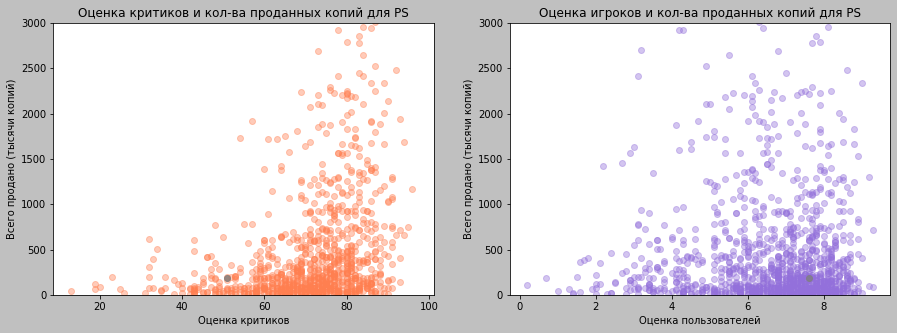

Корреляция между оценкой критиков и кол-вом проданных копий для GC составила nan
Корреляция между оценкой пользователей и кол-вом проданных копий для GC составила nan


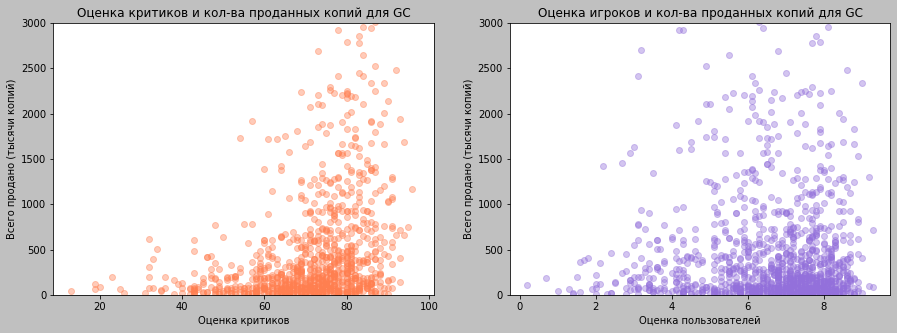

In [32]:
for platform in data_copy["platform"].unique():
    plot_sales_by_platform(data_copy, platform)

Из анализируемых платформ, только 3DS от Nintendo, PSP и WiiU имеют небольшую корреляцию между оценкой пользователей и кол-вом проданных копий, линия регрессии на графиках остальных платформ практически прямая. Возможно игроки оформляют предзаказы на интересующие их игры, в которых разочаровываются на момент выхода игры. Либо влияет такой фактор, что люди скорее оставят негативный отзыв, а если их все устраивает, то могут и не оставить отзыв вовсе.

Nintendo 3DS и PSP - платформы, ориентированные на детей и такая группа пользователей может быть более активной в обратной связи и отзывах.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Здесь, конечно, все проверить необходимо на акутальном периоде и главное - не стоит ограничиваться списком платформ, а стоит рассмотреть все входящие в акутальный период. Такие выводыбудут выглядеть "весомей" и убедительней.  для этого можно автоматизировать процесс. 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлен период. Корреляция и выводы не изменились. Подробно не анализирую все платформы, входящие в период, так как они не актуальны на 2016 год и многим не хватает данных даже для расчета корреляции. Но графики по Вашему замечанию построила. Процесс итак "автоматизирован", у меня написана для этого функция.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Принято</div>

#### Анализ распределения игр по жанрам

Рассмотрим распределение игр по жанрам и какие из жанров самые прибыльные. Используем для анализа данные с 2012 года по всем платформам.

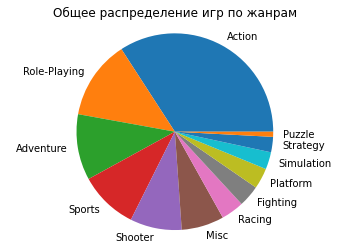

Action          772
Role-Playing    294
Adventure       245
Sports          218
Shooter         192
Misc            158
Racing           85
Fighting         80
Platform         77
Simulation       64
Strategy         57
Puzzle           19
Name: genre, dtype: int64

In [33]:
genre_counts = data_copy['genre'].value_counts()

plt.pie(genre_counts.values, labels=genre_counts.index)
plt.axis('equal')
plt.title("Общее распределение игр по жанрам")
plt.show()

genre_counts

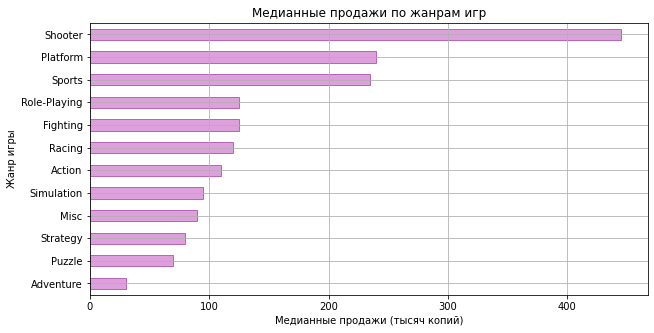

genre
Adventure        30.0
Puzzle           70.0
Strategy         80.0
Misc             90.0
Simulation       95.0
Action          110.0
Racing          120.0
Fighting        125.0
Role-Playing    125.0
Sports          235.0
Platform        240.0
Shooter         445.0
Name: total_sales, dtype: float64

In [34]:
grouped = data_copy.groupby('genre')['total_sales'].median().sort_values()

grouped.plot(kind='barh', grid=True, color='plum', figsize=(10, 5), edgecolor='purple', linewidth=0.5)
plt.xlabel("Медианные продажи (тысяч копий)")
plt.ylabel("Жанр игры")
plt.title("Медианные продажи по жанрам игр")
plt.show()

grouped

Самыми прибыльными жанрами на будущий 2017 год на основании медианных продаж и кол-ва выпущенных игр можно назвать:
- Шутеры (Shooter), показывающие самые высокие медианные продажи, немотря на то, что по кол-ву выпущенных игр они находятся только на 5 месте;
- Спортивные игры (Sports);
- Платформеры (Platform);
- Файтинги, которых выпускается совсем немного (8 место из 12 по кол-ву игр), также занимают одну из высоких позиций по медианным продажам.

Несмотря на большое кол-во игр, выпущенных в жанре Adventure, медианные продажи в этом жанре ниже.

Очень высокие показатели по кол-ву игр у Экшенов, но по медианным продажам они сильно уступают. Категория нестабильна.

Симуляторы, Стратегии и Головоломки - игр немного и медианные продажи низкие.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌ Молодец. Прекрасный анализ рынка, предметное знание (я люблю ведьмака и скайрим)
Все, конечно, стоит проверить на акутальном периоде. Здесь цифры в вывод предстоит откорректировать. Хотя не думаю что значительно изменится результат - ты выбирала вручную платформы в рассмотрение .      

Комментарий красный, поскольку нет ответа на вопрос о самых прибыльных жанрах. Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлен период. Прибыльные жанры указала. Анализ на основании медианы.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️ Хорошо</div>

### Портреты пользователей по регионам

#### Определение популярных платформ

Посмотрим, на общую картину из всех платформ, по продажам игр на которые есть данные с 2013 года.

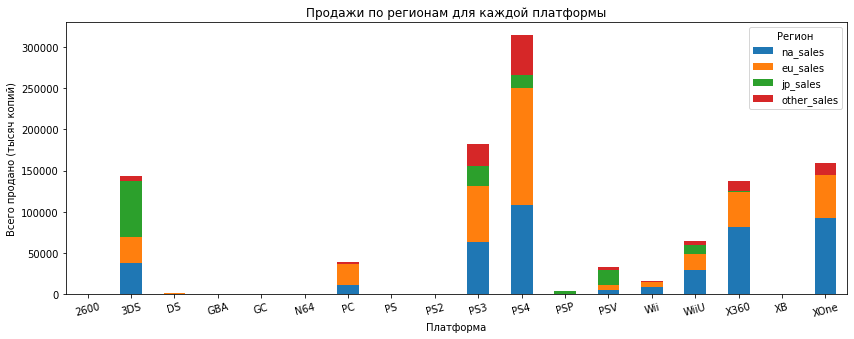

In [35]:
grouped = data_copy.groupby('platform').sum()[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

# строим график продаж
grouped.plot(kind='bar', stacked=True, rot=15, figsize=(14, 5))
plt.xlabel("Платформа")
plt.ylabel("Всего продано (тысяч копий)")
plt.title("Продажи по регионам для каждой платформы")
plt.legend(title='Регион')
plt.show()

In [36]:
# топ-5 платформ по доле в продажах в Северной Америке
data_platform = data_copy.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
data_platform.rename(columns={'na_sales': 'sum'}, inplace=True)
total_sales = data_platform['sum'].sum()
data_platform['percent'] = data_platform['sum'] / total_sales * 100
data_platform.head(5)

,sum,percent
platform,,
PS4,108740.0,24.639159
XOne,93120.0,21.099857
X360,81980.0,18.575669
PS3,63560.0,14.401921
3DS,38200.0,8.655654


In [37]:
# топ-5 платформ по доле в продажах в Европе
data_platform = data_copy.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
data_platform.rename(columns={'eu_sales': 'sum'}, inplace=True)
total_sales = data_platform['sum'].sum()
data_platform['percent'] = data_platform['sum'] / total_sales * 100
data_platform.head(5)

,sum,percent
platform,,
PS4,141090.0,35.766072
PS3,68450.0,17.351957
XOne,51590.0,13.077976
X360,42640.0,10.809166
3DS,30960.0,7.848307


In [38]:
# топ-5 платформ по доле в продажах в Японии
data_platform = data_copy.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
data_platform.rename(columns={'jp_sales': 'sum'}, inplace=True)
total_sales = data_platform['sum'].sum()
data_platform['percent'] = data_platform['sum'] / total_sales * 100
data_platform.head(5)

,sum,percent
platform,,
3DS,67830.0,47.909309
PS3,23350.0,16.492442
PSV,18590.0,13.130386
PS4,15960.0,11.272779
WiiU,10880.0,7.684701


В Японии практически не пользуются успехом игры на ПК и остальные платформы, кроме Nintendo 3DS (47,9 % от общих продаж в регионе). Компания основана в Японии и японцы традиционно предпочитают игровые системы от местного производителя. Также в Японии очень развит рынок мобильных игр, что в целом снижает спрос на игровые платформы.

Европейцы, судя по продажам на самых популярных платформах, предпочитают игры на Sony PS4 (35,8 %) больше, чем Xbox One и Nintendo 3DS. PS3 и X360 попали в рейтинг, так как были еще проажи по этим платформам в начале периода (2013-2014 гг.), но в последний год заметно снижение их популярности.

И нельзя сказать, что покупатели из Северной Америки выделяют какую-то одну платформу. Доли продаж по всем платформам отличаются незначительно, игры на ПК не попали в топ-5 и японская платформа Nintendo 3DS занимает последнюю строчку рейтинга с 8%.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌Хорошо.
    
Давай, вернемся к этому вопросу в актуальном периоде. и, пожалуйста, обрати внимание на пропущенный вопрос задания. звучит оно для этого шага:
    
- Самые популярные платформы (топ-5). <b>Опишите различия в долях продаж.</b>

    
и здесь предполагается оперировать долями в %, расчитанными на основании данных.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Рассчитаны доли.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Отлично. Доли расчитаны, выводы как и во всем проекте очень содержательны.</div>

#### Определение популярных жанров 

Посмотрим на популярные жанры без привязки к актуальным платформам. Используем данные по всем платформам за период с 2007 года.

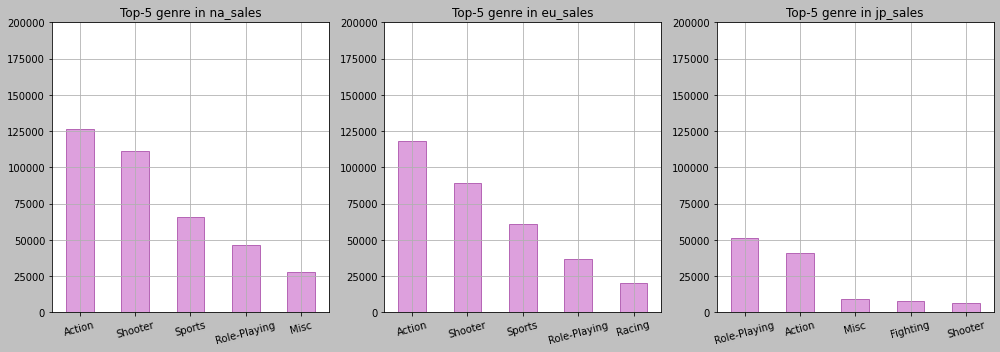

In [39]:
# функц. принимает датасет и список из регионов и рисует визуализацию по топ-5 из колонки на основании продаж в регионах
def visualize_top_from_col(df, regions, col, ylim):
    fig, axs = plt.subplots(1, len(regions), figsize=(14, 5), facecolor='silver') # исп-ем axs, чтобы нарисовать наглядно рядом
    for i, region in enumerate(regions):
        # отфильтруем по региону
        region_df = df[[col, region]]

        # топ-5 по продажам
        top_genres = region_df.groupby(col).sum().sort_values(by=region, ascending=False).head(5)

        top_genres.plot(kind='bar', legend=False, grid=True, color='plum', edgecolor='purple', linewidth=0.5, ax=axs[i], rot=15)

        axs[i].set_title(f"Top-5 {col} in {region}") # на английском, потому что столбцы на англ.
        axs[i].set_xlabel('')
        
        # добавим ограничение по оси Y, чтобы было видно сравнение по разным регионам
        axs[i].set_ylim(0, ylim)
        
    plt.tight_layout()
    plt.show()

visualize_top_from_col(data_copy, ["na_sales", "eu_sales", "jp_sales"], 'genre', 200000)

Самые высокие показатели по продаже игр с 2013 года в Северной Америке, далее идет Европа и меньше всего продается игр в Японии. В топ-5 жанров попал Misc (Miscellaneous) "Смешанное", то есть игры не относящиеся к какой-то конкретной категории, это могут быть инди-игры, игры типа survival horror и какие-то другие развлекательные или экспериментальные игрушки с несложным геймплеем и быстрым прохождением.

В Японии лидируют по продажам игры жанра RPG, а в Европе и Америке - Action. Файтинги в Японии тоже популярны, но не вошли в топ других странах.

В Европе с 2013 года продано почти 25 млн. копий игр жанра Гонки, таких продаж нет в других исследуемых регионах.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Очень хорошо и видно сравнение регионов. Вот почему-то здесь ты решаешь отказаться от рассмотрения топовых платформ. Эх. Почему не раньше. 
    
❌ и, конечно, проверяем все на актуальном периоде.. 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлен период. Не горела желанием переделывать проект, но в связи с неочевидным ТЗ и разным видением разных ревьюеров проще сделать как поняла сама и переделать, чем понять, что от тебя треубется.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️К ТЗ на самом деле не так часто как может показаться, возникают вопросы. Но они есть. 
Иногда понять что от тебя хочет заказчик, это тоже часть работы. Я рада, что понимание в итоге есть, сожалею, что это становится предметом обсуждения и раздражения на страницах работ, но это не в моей компетенции.</div>

#### Влияние рейтинга ESRB на продажи в регионах

Построим графики из топ-5 оценок из рейтинга ESRB по продажам в регионах.

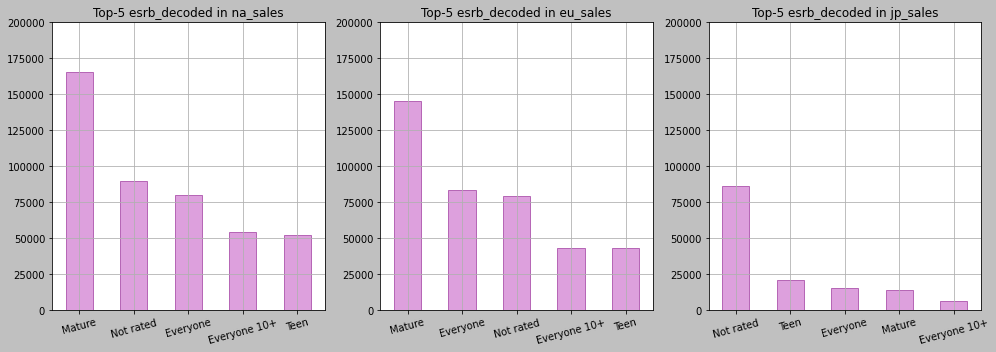

In [40]:
visualize_top_from_col(data_copy, ["na_sales", "eu_sales", "jp_sales"], 'esrb_decoded', 200000)

Можно проследить следующую тенденцию в продажах игр по регионам:
- больше всего продается игр в категории "для всех возрастов";
- игры "для взрослых" 18+ идут на втором месте в США и Европе и уступают играм "для подростков" от 13 лет в Японии;
- меньше всего не попавших в рейтинг игр куплено в Северной Америке и больше всего в Японии;
- игры "для подростков" и "для всех от 10 лет и старше" занимают прочные позиции в топе во всех странах.

В разных странах используются разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO. Чем и можно объяснить большое кол-во неоцененных игр по системе ESRB в Японии.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Молодец!  Здесь ты учитываешь игры без рейтинга. Совершенно верно объясняешь происхождение.

Интересно, не были ли искусственно измененные 20% данных большей частью из одного региона? Тогда это сильно перекосило нашу картину... Надеюсь, теперь ты видишь где наша замена даже вполне обоснованная могла исказить результат.
    
    
    
Пожалуйста, проверь все результаты шага на акутальном для прогноза периоде. 
    
    
    

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Действительно, теперь заметно, что в Японии продано больше всего неоцененных игр по этой системе. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️Так и есть, игры без рейтинга стали яркой чертой в портрете японского пользователя.</div>

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы проверить гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, можно использовать двухвыборочный t-тест.

В качестве уровня значимости (alpha) можно установить, например, 0.05. Это означает, что мы считаем ошибочной гипотезу о равенстве средних только если уровень значимости меньше 0.05. То есть, что есть 5% шанс того, что результаты выборок могут быть получены случайным образом, несмотря на то, что их средние значения различаются.

Формулируем гипотезы:
- H0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC равны.
- H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Если выборка содержит пустые значения, p-value будет показывать nan вместо результата. Столбец 'user_score' содержит пропуски, поэтому их следует удалить перед вычислениями.

In [41]:
# отфильтруем нужные данные, удалим пропуски
xbox_one = data_copy[data_copy['platform'] == 'XOne']['user_score'].dropna()
pc = data_copy[data_copy['platform'] == 'PC']['user_score'].dropna()

# опр-м уровень статистич. знач-ти
alpha = 0.05

# исп-ем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей
results = stats.ttest_ind(xbox_one, pc, equal_var=False)

print('Средняя оценка пользователей игр платформы Xbox One: {:.2f}'.format(xbox_one.mean()))
print('Средняя оценка пользователей игр платформы PC: {:.2f}'.format(pc.mean()))
print('p-значение:', results.pvalue)

# если p-value меньше уровня стат.знач-ти, отвергаем гипотезу
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC существенно не отличаются.")


Средняя оценка пользователей игр платформы Xbox One: 6.52
Средняя оценка пользователей игр платформы PC: 6.27
p-значение: 0.14318026281937496
Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC существенно не отличаются.


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌ Верно формулируешь гипотезы, проводишь тесты, предварительно удаляешь пропуски, выводишь p_value. Можно выводить и непосредственно среднее для оценки.




- необходимо будет проверить тест на актуальном периоде и скорректировать вывод по проверке гипотезы.
    
    
- Вот здесь прекрасная статья, я думаю она поможет тебе с выводами и очень пригодится в будущем. https://allatambov.github.io/psms/pdf/hypo-test.pdf 



</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Актуальный период исправлен, добавлено среднее. Не понимаю, куда корректировать вывод по проверке гипотезы. Мы ее не отклонили, в статье прописан такой же вывод. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера 2:</b>⚠️ на неактуальном периоде, в предыдущей версии проекта эта гипотеза была отвергнута. И вывод был сделан как утверждение, которое стоит в коде для печати в этом случае. 
Замечание было сделано по выводу, поскольку отвергнуть нулевую гипотезу не значит принять альтернативную. Сейчас вывод по этому тесту вопросов у меня не вызывает. 
    
А вот примеры выводов из той же статьи. 
    
Пример статистического вывода: на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания/нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.   
Пример содержательного вывода: среднее значение индекса политической стабильности для демократических стран не равно 2.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Теперь понятно, спасибо </div>

#### Средние пользовательские рейтинги жанров Action и Sports разные

Формулируем гипотезы:
- H0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports равны.
- H1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports различаются.

In [42]:
action_ratings = data_copy[data_copy['genre'] == 'Action']['user_score'].dropna()
sports_ratings = data_copy[data_copy['genre'] == 'Sports']['user_score'].dropna()

results = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print('Средняя оценка пользователей игр жанра Action: {:.2f}'.format(action_ratings.mean()))
print('Средняя оценка пользователей игр жанра Sports: {:.2f}'.format(sports_ratings.mean()))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports равны.")

Средняя оценка пользователей игр жанра Action: 6.84
Средняя оценка пользователей игр жанра Sports: 5.24
p-значение: 9.573249660478397e-21
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌ аналогично предыдущему шагу

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Актуальный период исправлен, добавлено среднее. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера 2:</b>❌ Здесь при проверке второй гипотезы - ошибка идет от неверно сформулированных гипотез. 
    
Нулевая гипотеза всегда содержит равенство. Поэтому в данном случае и результат будет звучать по-другому. Пожалуйста, исправь это шаг.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлена формулировка гипотез, код для вычисления. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера 2:</b>✔️ Гипотезы теперь сформулированы верно. Вывод исправлен. 
    

    
</div>

### Общий вывод

Около 50% всех игр, поступивших в продажу с 1980 по 2016 год вышли на платформы Sony PS2, Nintendo DS, Sony PS3, Nintendo Wii и Xbox X360.

С 2005 по 2012 год можно наблюдать пик в выходе новых игр - более 1000 игр ежегодно. Данные года совпадают с максимальными продажами на игры платформ Wii, Xbox X360, Nintendo DS и Sony PS3.

Оценки критиков и пользователей совпадают тем больше, чем выше рейтинг игры.

**На дату проведения анализа самыми популярными и потенциально прибыльными платформами на 2017 год являются Sony PS4, Xbox One, Nintendo 3DS и WiiU. Продажи на всех платформах идут на спад последние года и это общая тенденция с 2012 года. Также в этот список можно включить показывающий стабильные результаты из года в год ПК (PC).** 

Несмотря на наличие игр, которые были проданы 2-мя млн. копий и больше, 50% игр на приставки не продавались в кол-ве, больше чем: всего 120 тыс. копий на 3DS, 200 тыс. копий на PS4, 220 тыс. копий на XOne и 50 тыс.копий на ПК.

Положительная оценка критиков слабо влияет на кол-во проданных копий, а оценка пользователей не влияет практически никак. Небольшая зависимость продаж от оценок пользователей заметна только у платформы Nintendo 3DS. Большинство игр, получивших достаточно высокую оценку критиков, выше 70 из 100, так и не смогли преодолеть низкий уровень продаж (около 150 тысяч копий). В тоже время есть и игры, которые продавались в большем кол-ве, несмотря на низкий рейтинг критиков.

**Самыми прибыльными жанрами на будущий 2017 год на основании медианных продаж и кол-ва выпущенных игр можно назвать:**
- Шутеры (Shooter), показывающие самые высокие медианные продажи, немотря на то, что по кол-ву выпущенных игр они находятся только на 5 месте;
- Спортивные игры (Sports);
- Платформеры (Platform);
- Файтинги, которых выпускается совсем немного (8 место из 12 по кол-ву игр), также занимают одну из высоких позиций по медианным продажам.

В Японии предпочитают игры на платформы местного производителя Nintendo, в Европе лидирует Sony PS, а в США предпочитают разные игровые приставки, в особенности Sony PS и Xbox.

Самые высокие показатели по продаже игр с 2007 года в Северной Америке, далее идет Европа и меньше всего продавалось игр в Японии. Экшены и Спортивные игры популярны во всех регионах, Шутеры покупают в США и Европе, но не в Японии. В Японии лидируют по продажам игры жанра RPG, но в Европе они даже не вошли в топ-5, а в Америке находятся на последнем месте в топе. В игры категории  Misc, несмотря на то, что они попали в топ по всем странам, вкладываться невыгодно, так как они недорогие и показывают низкий уровень проданных копий по последним актуальным платформам.

**Рейтинг ESRB влияет на кол-во проданных копий**, самые успешные игры - "для всех возрастов" (рейтинг 'E'), на втором месте в США и Европе игры 18+ "для взрослых" (рейтинг 'M'), далее идут игры "для подростков" и "всех от 10 лет" (рейтинг 'T' и 'E10+'). В разных странах используются разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO, поэтому самая актуальная информация по влиянию рейтинга ESRB - по продажам в США.


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Вывод хороший по структуре - молодец, но стоит его смотреть подробно уже после внесения всех исправлений в проект. Давай вернемся к его содержанию при следующей проверке.  

Стоит вспомнить о цели проекта, которую ты указываешь в самом начале, и внести итоги в общий вывод, можно его сформулировать в качестве рекомендации. 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Выводы скорректированы. Какая может быть рекомендация, если это вымышленная компания и у нас нет данных о ее деятельности. Все прописано подробно по всем параметрам, которые только могут потребоваться - рейтинг, оценки критиков и пользователей, жанры и платформы, регионы.</div>

<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера:</b>
Ольга, ты молодец! Это твой первый сборный проект и работа проделана большая. Проект получился замечательный! Ты владеешь материалом, различными инструментами, делаешь хорошие выводы и комментируешь ход исследования. Но есть и над чем поработать для его принятия. 
    
    
    
все замечания я постаралась подробно прокомментировать. Уверена, у тебя все получится.    
    

Буду ждать твой проект! Удачи!

 
</div>

<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера 2:</b>
Ольга, спасибо за большую и добросовестно проделанную работу по улучшению проекта. Все замечания и не только критические устранены, кроме проверки последней гипотезы. Для принятия проекта во втором тесте достаточно верно сформулировать гипотезы и сформулировать вывод.
    
Буду ждать 
 
</div>

<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера 3:</b>
Ольга, еще раз спасибо за работу над проектом. Проект получился очень хороший и я принимаю его. Еще раз подчеркну, что ты делаешь замечательные выводы, владеешь материалом и очень внимательна к данным. Это здорово! 
    
Действительно, часто формулировки задачи бывают не совсем однозначными. Как и в жизни. 

    
Желаю тебе успехов в дальнейшем обучении. Впереди очень много интересного! Удачи тебе!</div>